# Task 4 - Quantify Feature Values

## Response Visualizations

## Statistics

### Calculations

In [3]:
import numpy as np
import math
import pandas as pd
from statistics import mean

# returns window of overall max distance traveled within window
def get_speed_per_window(df,window_size, threshold):

    #reorder to frame-id matrix and fill with according acceleration
    ldf = df.pivot_table(index='t',columns='a',values=['x','y'])
    top = len(ldf) - window_size + 1
    relationship_fast_slow = {}
    window_speed = {}
    for i in range(top): # iterate over frames from 0 to last start of window
        win_id = "window_"+ str(i)
        slow_movers_num = 0 
        fast_movers_num = 0 
        for j in range(len(ldf.iloc[i])//2):

            dist_per_window_per_fish = 0
            for n in range(0, window_size-1):
                departure_point = (ldf.iloc[i+n]['x'][j], ldf.iloc[i+n]['y'][j]) # go from here
                arrival_point = (ldf.iloc[i+n+1]['x'][j], ldf.iloc[i+n+1]['y'][j]) # to here
                dist_per_window_per_fish = dist_per_window_per_fish + math.hypot(arrival_point[0] - departure_point[0], arrival_point[1] - departure_point[1]) 

            if dist_per_window_per_fish >= threshold:
                fast_movers_num = fast_movers_num + 1
            else:
                slow_movers_num = slow_movers_num + 1
        window_speed[win_id] = dist_per_window_per_fish
        relationship_fast_slow[win_id] = [fast_movers_num, slow_movers_num]
    return [relationship_fast_slow,window_speed]
arr = get_speed_per_window(pd.read_csv('fishdataEVAL.csv'),3, 4.592719779267431)
rel_fast_slow = arr[0]
speed_per_window = arr[1]

print(rel_fast_slow['window_1425']) #57
print(rel_fast_slow['window_1000']) #40
print(rel_fast_slow['window_550']) #22

print(53/151) #57
print(108/151) #40
print(55/151) #22

correct_values = [1.0, 3.0, 1.0]

[52, 99]
[108, 43]
[55, 96]
0.3509933774834437
0.7152317880794702
0.36423841059602646


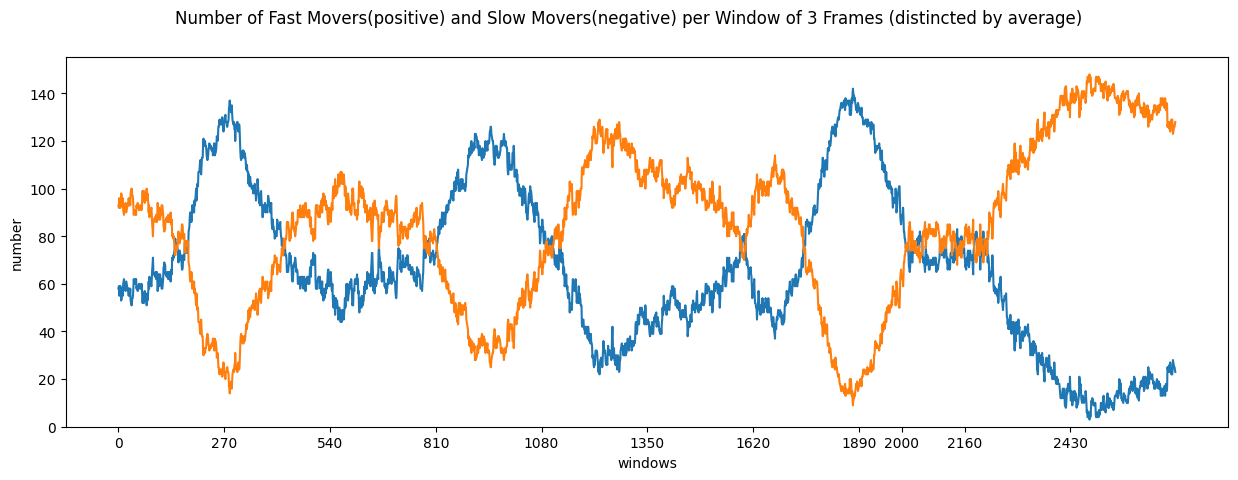

In [6]:
def create_plot(relationship_fast_slow): 
    # First, import the necessary libraries
    import matplotlib.pyplot as plt

    # Extract the data from the dictionary
    windows = relationship_fast_slow.keys()
    relation = relationship_fast_slow.values()



    # Create Figure and Axes instances
    fig,ax = plt.subplots(1)
    fig.set_figwidth(15)
    fig.suptitle('Number of Fast Movers(positive) and Slow Movers(negative) per Window of 3 Frames (distincted by average)')
    # Make your plot, set your axes labels
    ax.plot(windows, relation)
    ax.set_ylabel('number')
    ax.set_xlabel('windows')


    ticks = np.arange(0,len(windows),len(windows)//10+1).tolist()
    ticks.append(2000)
    labels = ticks
    # Turn off tick labels
    ax.set_xticks(ticks)
    ax.set_xticklabels(labels)
    plt.ylim(ymin=0)
    # Display the chart
    plt.show()



create_plot(rel_fast_slow)

### Response and Completion Calculations

Technique: animation
Total Duration: 651
Duration Mean: 130.2
Duration Median: 124.0
Duration Minimum: 52
Duration Maximum: 217
Duration Variance: 3463.2

Technique: motionrugs
Total Duration: 163
Duration Mean: 32.6
Duration Median: 30.0
Duration Minimum: 23
Duration Maximum: 48
Duration Variance: 93.30000000000001

Technique: small_multiples
Total Duration: 207
Duration Mean: 41.4
Duration Median: 42.0
Duration Minimum: 30
Duration Maximum: 54
Duration Variance: 87.80000000000001

Technique: streamlines
Total Duration: 242
Duration Mean: 48.4
Duration Median: 48.0
Duration Minimum: 29
Duration Maximum: 77
Duration Variance: 368.79999999999995

animation
Total #answers 15
Mean #answers 3.0
Median #answers 3
Maximum #answers 3
Minimum #answers 3
Variance #answers 0
-------------
motionrugs
Total #answers 15
Mean #answers 3.0
Median #answers 3
Maximum #answers 3
Minimum #answers 3
Variance #answers 0
-------------
small_multiples
Total #answers 15
Mean #answers 3.0
Median #answers 3
Max

C:\Users\Raphael\AppData\Local\Temp\ipykernel_3836\2307850396.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Animation", "MotionRugs","Small Multiples", "Streamlines"])


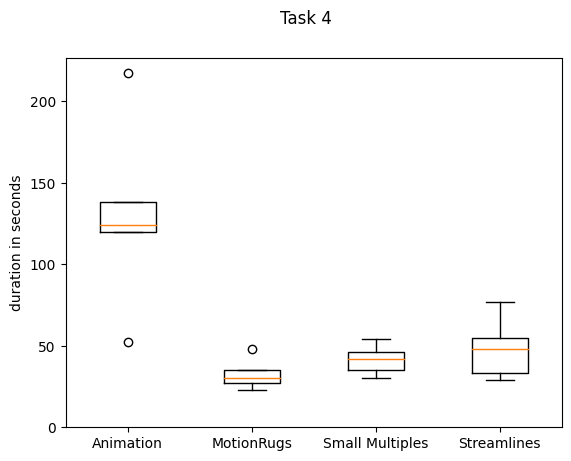

In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon
import ast
import statistics

# Create your connection.
cnx = sqlite3.connect('motionrugs.db')

qu_start = "SELECT id, Cast ((JulianDay(end_time) - JulianDay(start_time)) * 24 * 60 * 60 As Integer) as duration_seconds FROM tracking where task_id in (SELECT id from tasks WHERE group_id = "
qu_end = " AND task_type = 3)"

duration_data = []
for i in range(4):
    qu = qu_start + str(i) + qu_end
    duration_frame = pd.read_sql_query(qu, cnx)
    duration_data.append(duration_frame["duration_seconds"])
cnx.commit()
cnx.close()


techniques = ["animation", "motionrugs", "small_multiples", "streamlines"]
    
# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.set_ylabel('duration in seconds')
ax.set_xticklabels(["Animation", "MotionRugs","Small Multiples", "Streamlines"])
fig.suptitle('Task 4')
ax.boxplot(duration_data)
plt.ylim(ymin=0)
#plt.show()

# Process each series in the dataset
for i, series in enumerate(duration_data):
    print(f"Technique: {techniques[i]}")
    print("Total Duration:", series.sum())
    print("Duration Mean:", series.mean())
    print("Duration Median:", series.median())
    print("Duration Minimum:", series.min())
    print("Duration Maximum:", series.max())
    print("Duration Variance:", series.var())
    print()




# user duration
cnx = sqlite3.connect('motionrugs.db')

qu_start = "SELECT * FROM tracking where task_id in (SELECT id from tasks WHERE group_id = "
qu_end = " AND task_type = 3)"


tracking_data = {}
for i in range(4):
    qu = qu_start + str(i) + qu_end
    tracking_frame = pd.read_sql_query(qu, cnx)
    tracking_data[techniques[i]] = tracking_frame
cnx.commit()
cnx.close()



#user actions

for t in techniques:
    print(t)
    ev = {}
    task_d = tracking_data[t]["task_data"]
    
    # Convert the string representations of nested lists to actual lists
    a = task_d.apply(ast.literal_eval)

    # Collect the count of items in each sublist
    item_counts = [len(sublist) for sublist in a]

    # Calculate the mean
    mean_items = sum(item_counts) / len(item_counts)

    # Calculate the median
    median_items = statistics.median(item_counts)

    # Calculate the maximum and minimum
    max_items = max(item_counts)
    min_items = min(item_counts)

    # Calculate the variance
    variance_items = statistics.variance(item_counts)

    # Calculate the total number of items
    total_items = sum(item_counts)

    print("Total #answers", total_items)
    print("Mean #answers", mean_items)
    print("Median #answers", median_items)
    print("Maximum #answers", max_items)
    print("Minimum #answers", min_items)
    print("Variance #answers", variance_items)

    print("-------------")

C:\Users\Raphael\AppData\Local\Temp\ipykernel_3836\832749582.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Animation", "MotionRugs","Small Multiples", "Streamlines"])


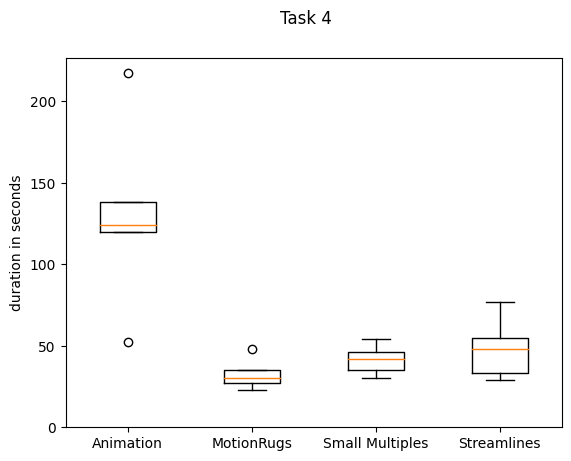

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon


# Create your connection.
cnx = sqlite3.connect('motionrugs.db')

qu_start = "SELECT id, Cast ((JulianDay(end_time) - JulianDay(start_time)) * 24 * 60 * 60 As Integer) as duration_seconds FROM tracking where task_id in (SELECT id from tasks WHERE group_id = "
qu_end = " AND task_type = 3)"

duration_data = []
for i in range(4):
    qu = qu_start + str(i) + qu_end
    duration_frame = pd.read_sql_query(qu, cnx)
    duration_data.append(duration_frame["duration_seconds"])
cnx.commit()
cnx.close()


# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.set_ylabel('duration in seconds')
ax.set_xticklabels(["Animation", "MotionRugs","Small Multiples", "Streamlines"])
fig.suptitle('Task 4')
ax.boxplot(duration_data)
plt.ylim(ymin=0)
plt.show()

### Error Calculations

In [11]:
def translate_to_error_val(v):
    e = 0
    if(v==0.0):
        e=10
    if(v==1.0):
        e=30
    if(v==2.0):
        e=50
    if(v==3.0):
        e=70
    if(v==4.0):
        e=90
    return e

def translate_small_multi(s):
    row = int(s[0])
    col = int(s[2]) +1
    mul = 0
    return 66*(8*row + col)

import json    

cnx = sqlite3.connect('motionrugs.db')

qu_start = "SELECT * FROM tracking where task_id in (SELECT id from tasks WHERE group_id = "
qu_end = " AND task_type = 3)"

techniques = ["animation", "motionrugs", "small_multiples", "streamlines"]
tracking_data = {}
for i in range(4):
    qu = qu_start + str(i) + qu_end
    tracking_frame = pd.read_sql_query(qu, cnx)
    tracking_data[techniques[i]] = tracking_frame
cnx.commit()
cnx.close()

data_t3 = {}
for t in techniques:
    a = []
    for b in tracking_data[t]['task_data']:
        # convert the string to a dictionary
        b_dictionary = json.loads(b)
        v = {"values": [float(b_dictionary[0]), float(b_dictionary[1]), float(b_dictionary[2])]}
        a.append(v)

    data_t3[t] = a
print(data_t3)

correct_values = [1.0, 3.0, 1.0]

import numpy as np


# Iterate over each technique in the data dictionary
for technique in data_t3:
    # Extract all the values associated with the current technique and flatten the list
    values = [val for item in data_t3[technique] for val in item['values']]

    # Find the nearest frame in correct_values for each value
    nearest_frames = [correct_values[i % len(correct_values)] for i, val in enumerate(values)]
    
    # Calculate the absolute difference between the values and the nearest frames
    differences = np.abs(np.array(values) - np.array(nearest_frames))

    # Calculate the average difference
    average_difference = np.mean(differences)

    # Calculate the mean, median, minimum, maximum, and variance of the values
    mean_values = round(np.mean(differences), 2)
    median_values = round(np.median(differences), 2)
    min_values = round(np.min(differences), 2)
    max_values = round(np.max(differences), 2)
    var_values = round(np.var(differences), 2)

    # Print the technique and the calculated attributes
    print("----------------------")
    print("Technique:", technique)
    print("Absolute Frame Error:", round(sum(differences), 2))
    print("Mean Frame Error:", mean_values)
    print("Median Frame Error:", median_values)
    print("Minimum Frame Error:", min_values)
    print("Maximum Frame Error:", max_values)
    print("Variance Frame Error:", var_values)
    print()


{'animation': [{'values': [2.0, 4.0, 1.0]}, {'values': [2.0, 3.0, 2.0]}, {'values': [1.0, 4.0, 1.0]}, {'values': [0.0, 2.0, 0.0]}, {'values': [0.0, 4.0, 2.0]}], 'motionrugs': [{'values': [0.0, 0.0, 3.0]}, {'values': [0.0, 1.0, 3.0]}, {'values': [0.0, 1.0, 2.0]}, {'values': [0.0, 1.0, 2.0]}, {'values': [0.0, 1.0, 3.0]}], 'small_multiples': [{'values': [0.0, 1.0, 4.0]}, {'values': [0.0, 1.0, 4.0]}, {'values': [0.0, 1.0, 4.0]}, {'values': [0.0, 2.0, 4.0]}, {'values': [0.0, 1.0, 4.0]}], 'streamlines': [{'values': [0.0, 1.0, 4.0]}, {'values': [0.0, 1.0, 4.0]}, {'values': [0.0, 0.0, 4.0]}, {'values': [0.0, 1.0, 3.0]}, {'values': [0.0, 2.0, 4.0]}]}
----------------------
Technique: animation
Absolute Frame Error: 11.0
Mean Frame Error: 0.73
Median Frame Error: 1.0
Minimum Frame Error: 0.0
Maximum Frame Error: 1.0
Variance Frame Error: 0.2

----------------------
Technique: motionrugs
Absolute Frame Error: 24.0
Mean Frame Error: 1.6
Median Frame Error: 2.0
Minimum Frame Error: 1.0
Maximum Fram